# Analysis of random correlaor

In [1]:
import ADerrors as AD
import LinearAlgebra as LA
import HDF5
import Plots
import Statistics as Stats
import Random
using LaTeXStrings
import CorrelatorAnalysis as CA

In [2]:
# Creat random correlator
rng = Random.MersenneTwister(154)
Nₜ, N_cnfg = 16, 100

τ = 4
A_exact, m_exact = 1e-2, 0.1
σ_rel = 0.01

corr = Array{Float64}(undef, Nₜ, N_cnfg)
for (iₜ, t) in enumerate(0:Nₜ-1)
    μ = A_exact*cosh(m_exact*(t - Nₜ/2))
    corr[iₜ, :] = CA.markov_chain(rng, N_cnfg, μ, σ_rel*μ, τ)
end


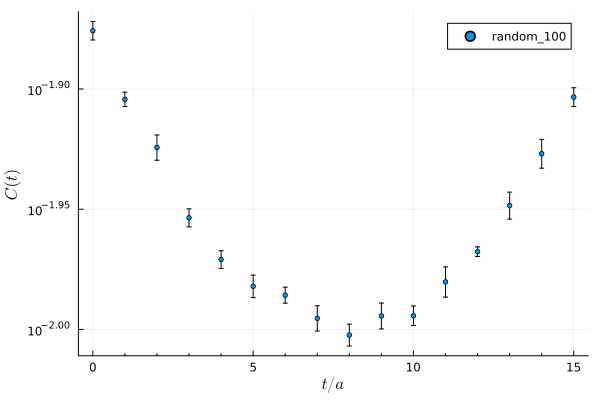

In [3]:
# Correlator
mcid = "random_100"
Cₜ = CA.uwreal_array(corr, mcid, :auto)

p = CA.plot_correlator(Cₜ)
display(p)

In [4]:
AD.taui(Cₜ[1], mcid)

3.2895936147331373

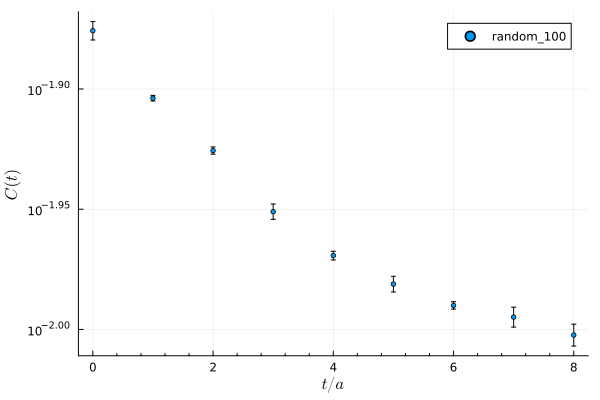

In [5]:
# Folded correlator
Cₜ_folded = CA.fold_correlator(Cₜ)

p = CA.plot_correlator(Cₜ_folded)
display(p)

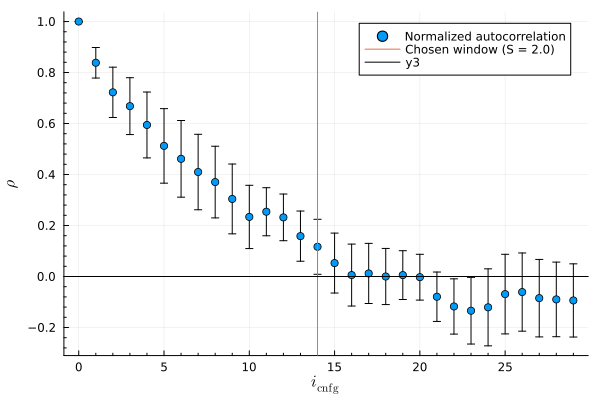

In [6]:
CA.plot_autocorrelation(Cₜ[10], mcid, markersize=4)

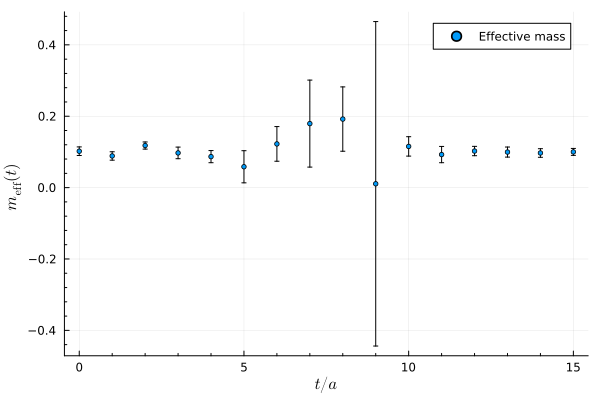

In [7]:
# Effective mass
am_eff = CA.effective_mass(Cₜ, :cosh)

p = Plots.plot()#xlim=[0, 64], ylim=[:auto, 800])
CA.plot_effective_mass!(am_eff)
display(p)

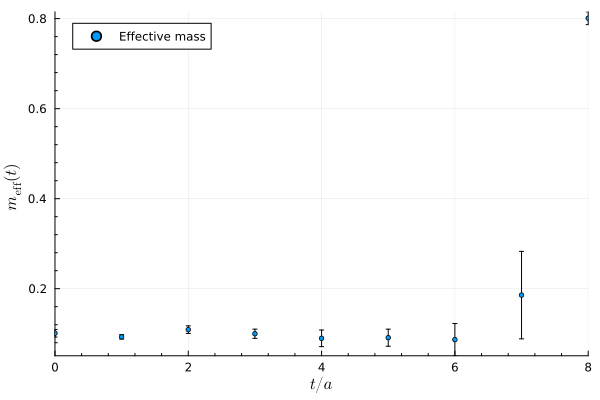

In [8]:
# Effective mass of folded correlator
am_eff_folded = CA.effective_mass(Cₜ_folded, :cosh, folded=true)
CA.err!.(am_eff_folded)

p = Plots.plot(xlim=[:auto, :auto], ylim=[:auto, :auto])
CA.plot_effective_mass!(am_eff_folded)
display(p)

In [9]:
# Plateau range (lattice units)
plateau_range = [3, 13]
plateau_range_folded = [2, 6]

am = CA.fit_plateau(am_eff, plateau_range)
am_folded = CA.fit_plateau(am_eff_folded, plateau_range_folded)

CA.err!(am), CA.err!(am_folded)

(0.09857953527612914 +/- 0.0029420627700110684, 0.1020229106551377 +/- 0.0036618279375828233)

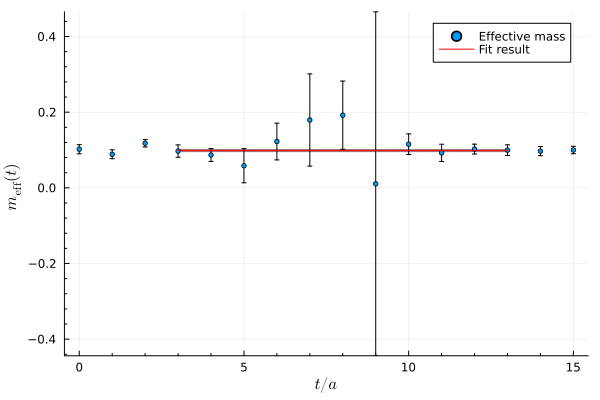

In [10]:
# Plot effective mass with fit to plateau
p = Plots.plot(ylim=[:auto, :auto])
CA.plot_effective_mass!(am_eff)
CA.plot_error_rectangle!(am, plateau_range)
display(p)

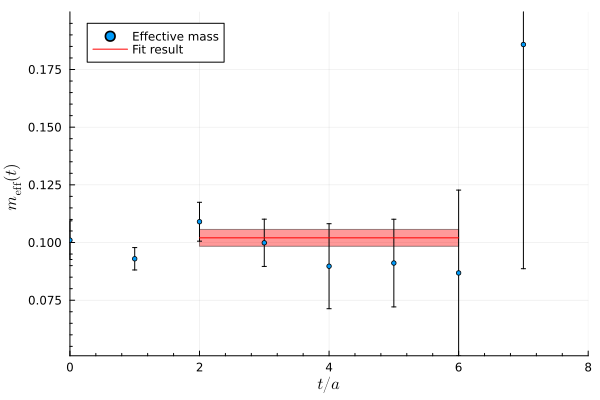

In [11]:
# Plot effective mass of folded correlator with fit to plateau
p = Plots.plot(xlim=[:auto, :auto], ylim=[:auto, 0.2])
CA.plot_effective_mass!(am_eff_folded)
CA.plot_error_rectangle!(am_folded, plateau_range_folded)
display(p)